In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df.drop(columns=['Cabin'], inplace=True)

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_6716\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)

In [13]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [14]:
df.drop(columns=['Name','Ticket','PassengerId'], inplace=True)

## Analisis Exploratorio

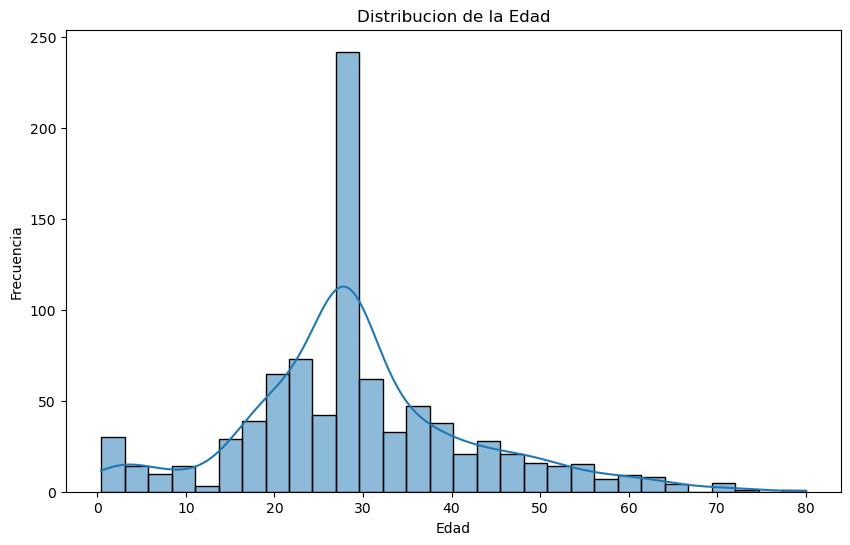

In [16]:
# Distribucion de edades 
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30,kde=True)
plt.title('Distribucion de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Supervivencia  por clase 

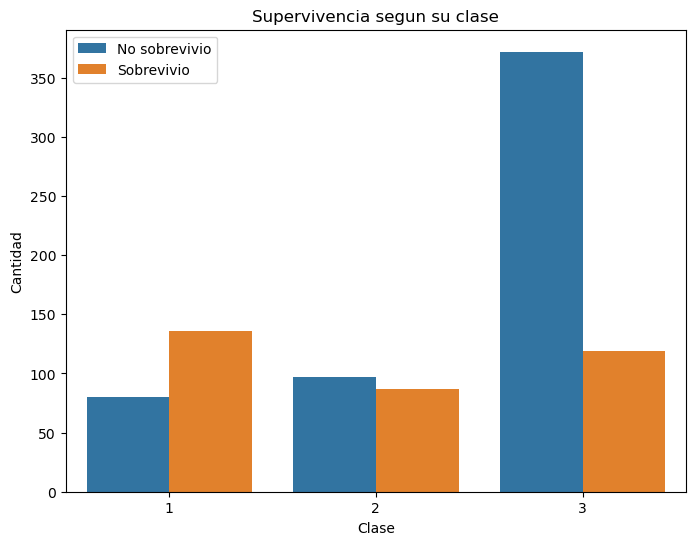

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Supervivencia segun su clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.legend(['No sobrevivio', 'Sobrevivio'])
plt.show()

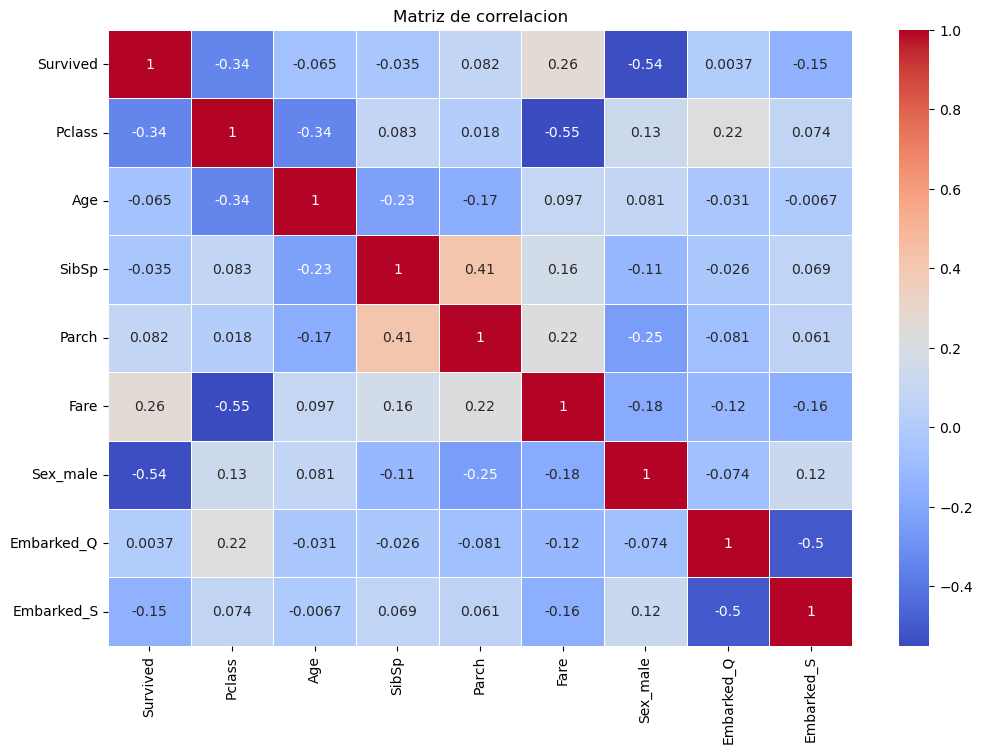

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlacion')
plt.show()

In [20]:
## Preparacion para el modelo 

features = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
x = df[features]
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [22]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



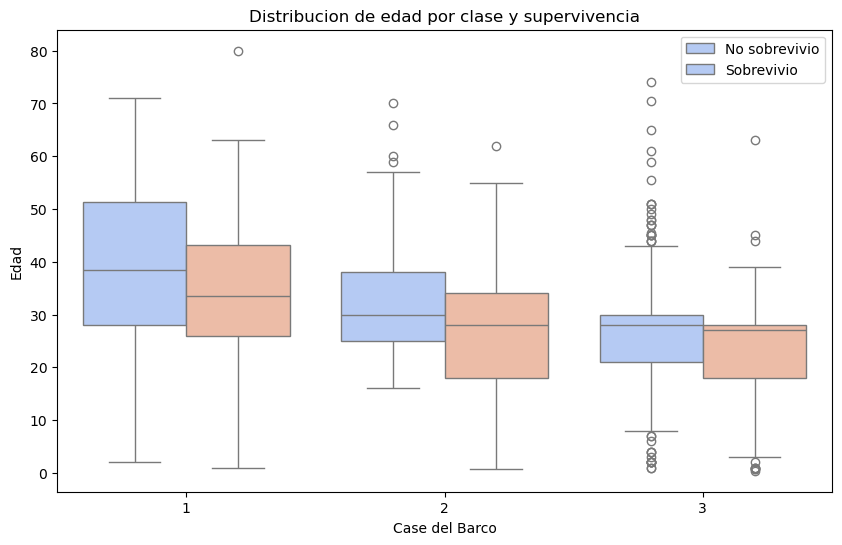

In [23]:
## Supervivencia por edad y clase usando boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=df,palette='coolwarm')
plt.title('Distribucion de edad por clase y supervivencia')
plt.xlabel('Case del Barco')
plt.ylabel('Edad')
plt.legend(['No sobrevivio','Sobrevivio'])
plt.show()

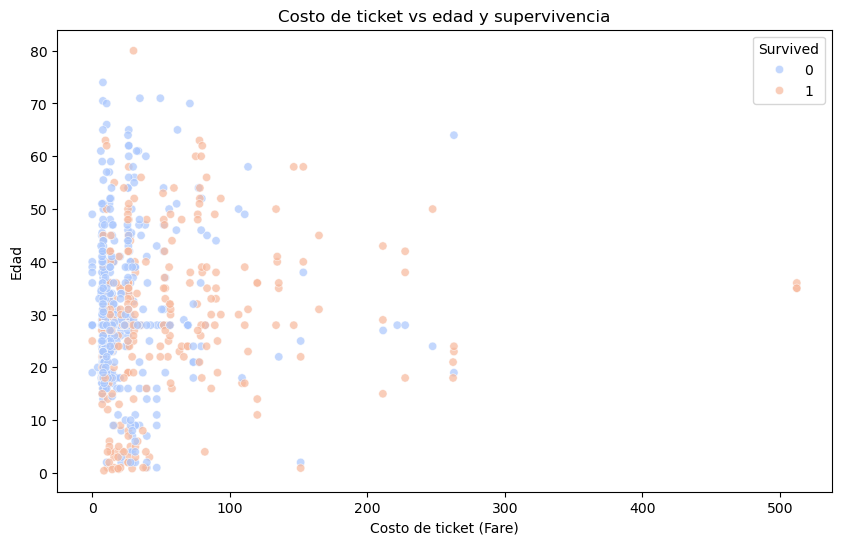

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Fare',y='Age',hue='Survived',data=df,alpha=0.7,palette='coolwarm')
plt.title('Costo de ticket vs edad y supervivencia')
plt.xlabel('Costo de ticket (Fare)')
plt.ylabel('Edad')
plt.show()

<Figure size 1200x800 with 0 Axes>

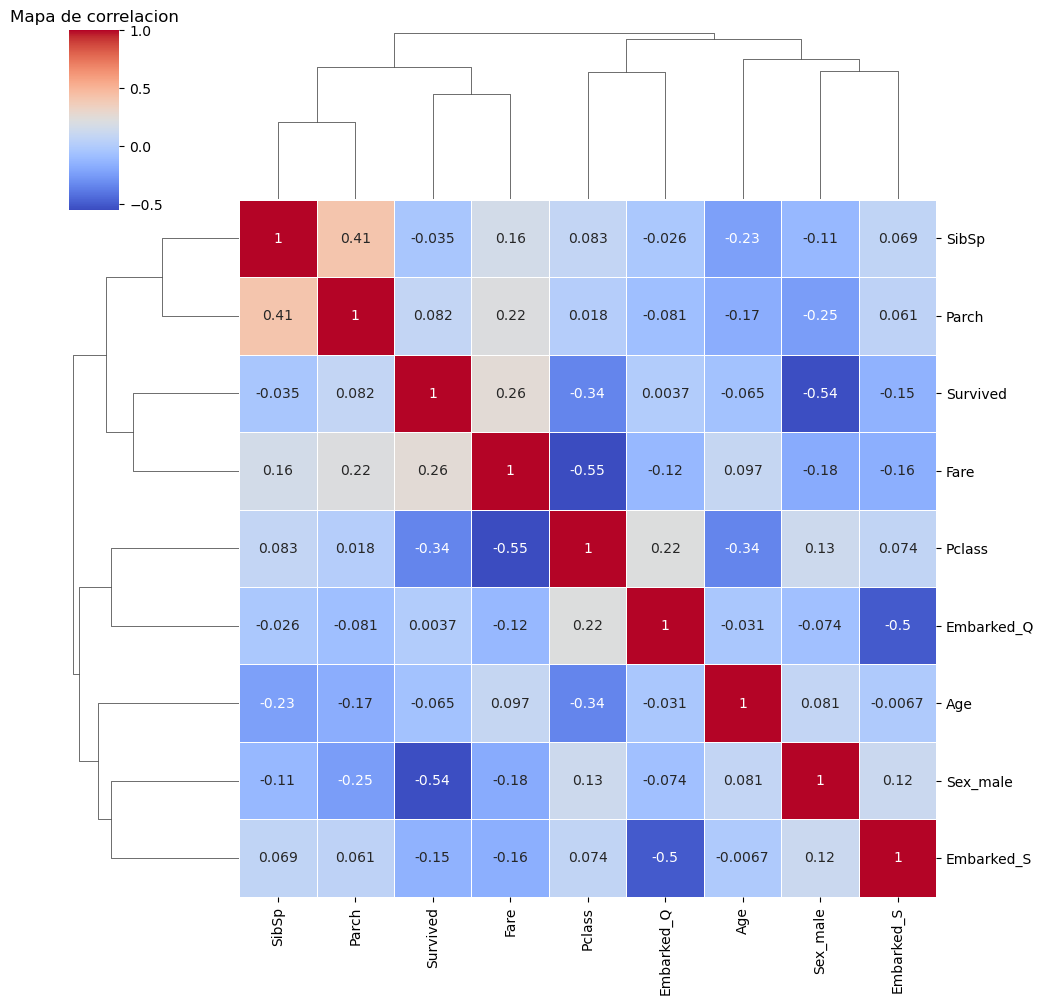

In [25]:
plt.figure(figsize=(12,8))
sns.clustermap(df.corr(),annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Mapa de correlacion')
plt.show()

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
## Randome Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [28]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [29]:
## EXtreme Gradeitn Boosting
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train,y_train)

y_pred_xgb = xgb.predict(x_test)
print("XGBoost accuracy", accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

XGBoost accuracy 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
## Red Neuronal con tensorFlow/Keras (Prueba 1)

from tensorflow import keras
from tensorflow.keras import layers

## Definimos la arquitectura de la red

model_nn = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

#compilamos el modelo
model_nn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#Entrenamiento
model_nn.fit(x_train, y_train, epochs=50, batch_size=16,verbose=1,validation_data=(x_test, y_test))
#Evaluacion
loss, accuracy = model_nn.evaluate(x_test, y_test)
print(f"Red Neuronal Accuracy: {accuracy:.2f}")

C:\Users\angel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4754 - loss: 0.7516 - val_accuracy: 0.6425 - val_loss: 0.6738
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6762 - loss: 0.6700 - val_accuracy: 0.6201 - val_loss: 0.6548
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6689 - loss: 0.6401 - val_accuracy: 0.6760 - val_loss: 0.6218
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6740 - loss: 0.6312 - val_accuracy: 0.6816 - val_loss: 0.5990
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6769 - loss: 0.6158 - val_accuracy: 0.6816 - val_loss: 0.5863
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6829 - loss: 0.6105 - val_accuracy: 0.6816 - val_loss: 0.5787
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6945 - loss: 0.5938 - val_accuracy: 0.7095 - val_loss: 0.5742
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6886 - loss: 0.6046 - val_accuracy: 0.6425 - val_loss

In [32]:
##Evaluacion de modelos 
y_pred_proba = model.predict_proba(x_test)[:, 1] 
y_pred = (y_pred_proba >= 0.5).astype(int)
accuracy_logreg = accuracy_score(y_test, y_pred)


y_pred_proba_nn = model_nn.predict(x_test)
y_pred_nn = (y_pred_proba_nn >= 0.5).astype(int)
accuracy_nn = accuracy_score(y_test, y_pred_nn)


y_pred_proba_rf = rf.predict_proba(x_test)[:, 1]
y_pred_rf = (y_pred_proba_rf >= 0.5).astype(int)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

models = {
    "Regresion Logistica": accuracy_logreg,
    "Random Forest": accuracy_rf,
    "Red Neuronal": accuracy_nn
}

for name, acc in models.items():
    print(f"{name}: {acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Regresion Logistica: 0.8101
Random Forest: 0.8156
Red Neuronal: 0.7542
